# Assignment 6

In [1]:
#Importing Datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1

Read the spotify dataset from the file *spotify_data.csv*. 

What percentage of all the unique tracks are contributed by the top 3 artists of each genre, where the top artists are based on *artist_popularity*, and the unique tracks are based on unique values of *track_name*? *(8 points for code)*

A typical approach that will **not** work: If you group the data by genre, and filter the top 3 rows by *artist_popularity*, then you may not get 3 unique artists, as one artist can have multiple tracks.

Here is one way to answer this question:

(1) Group the data by genre, artist name and artist popularity. Find the number of unique tracks (by *track_name*) for each group. \
(2) The dataset obtained in (1) is at artist-genre level, i.e., each row corresponds to a unique artist-genre combination. Group that dataset by genre, and filter the top 3 rows of each group based on artist popularity. \
(3) Sum up the number of unique tracks of the dataset obtained in (2) and divide it by the total number of unique tracks in the original dataset.

**Note:** 
(1) The functions *len()* and *unique()* will be useful. \
(2) If you can propose a solution that is shorter than the one proposed above, on Monday - 15th Nov, in class, you will get 10% bonus points for this assignment.

In [2]:
spotify = pd.read_csv("spotify_data.csv")

In [3]:
grouped = spotify.groupby(['genres', 'artist_name', 'artist_popularity']).apply(lambda x:len(x['track_name'].unique())).reset_index()
grouped

,genres,artist_name,artist_popularity,0
0,country,Alan Jackson,76,61
1,country,Blake Shelton,77,16
2,country,Brad Paisley,71,16
3,country,Brett Young,73,5
4,country,Casey Donahew,60,3
...,...,...,...,...
11949,rock,Óscar Chávez,51,33
11950,rock,İkiye On Kala,61,8
11951,rock,ДДТ,52,52
11952,rock,Дайте танк (!),58,22


In [4]:
data_top3 = grouped.groupby('genres').apply(lambda x : x.sort_values(by='artist_popularity', ascending = False)[0:3])

In [5]:
data_top3.head()

genres      artist_name  artist_popularity   0
genres                                                           
country    35     country    Morgan Wallen                 88  35
           30     country       Luke Combs                 85  21
           6      country  Chris Stapleton                 81  12
electronic 78  electronic        Daft Punk                 86  71
           58  electronic      Alan Walker                 85   7

In [6]:
data_top3[0].sum()/len(spotify['track_name'].unique())

0.047140401953927644

## Part 2

Read data from the file "Canadian_Fish_Biodiversity.csv" on Canvas. Each row records a unique fishing event from a 2013 sample of fish populations in Ontario, Canada. *(42 points overall)*

In [7]:
fish = pd.read_csv("Canadian_Fish_Biodiversity.csv")

In [8]:
fish.head()

,SITEID,Species,Number Captured,Minimum (mm),Maximum (mm),Project Name,Day,Month,Year,Waterbody Name,WaterbodyType,Start Latitude,Start Longitude,Air Temperature (C),Water Temperature (C),Turbidity (ntu)
0,5599,Notropis hudsonius,3.0,79.0,81.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
1,5599,Proterorhinus semilunaris,1.0,65.0,65.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
2,5599,Notropis hudsonius,1.0,75.0,85.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
3,5599,Percopsis omiscomaycus,3.0,94.0,105.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
4,5599,Notropis hudsonius,2.0,71.0,102.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3


### Question 1

To analyze the results of these fishing surveys, we need to understand the dynamics of projects, sites, and geographic locations. In large part the following questions deal with missing data. *(16 points total)*

a) Each site (identified by the column *SITEID*) represents a time and place at which fishing events occurred. Sites are grouped into broader projects (identified by the column *Project Name*). We want to understand the scope of these projects.

Using *.groupby*, find the top three projects by number of unique sites. *(2 points for code)*

**Hint**: The Pandas function *nunique()* may help

In [9]:
projects = fish.groupby('Project Name')
numsites = projects.SITEID.nunique()
numsites.sort_values(ascending = False)[0:3]

Project Name
2013 GLAP Survey of Detroit River           220
2013 Crown Marsh Survey                     146
2013 Spotted Gar Critical Habitat Survey    131
Name: SITEID, dtype: int64

b) Find the top three and bottom three projects in terms of the proportion of unique sites of the total number of unique sites. *(3 points for code)*

In [10]:
projects = fish.groupby('Project Name')
numsites = projects.SITEID.nunique()
numsites.sort_values(ascending = True)[0:3]

Project Name
2013 Species at Risk Assessment                 4
2013 Pugnose Shiner Critical Habitat Survey    10
2013 Grass Pickerel Twenty Mile Creek          10
Name: SITEID, dtype: int64

c) (i) How many values are missing for the air temperature column? *(1 point for code)*

(ii) Impute the missing values of air temperature with the median air temperature of the corresponding water body (*Waterbody Name*) and month. *(2 points for code)*

(iii) How many missing values still remain for the air temperature column after the imputation in (ii)? *(1 point for answer)*

(iv) We will try to impute the remaining missing values for air temperature. Try impute the remaining missing values of air temperature with the median air temperature of the corresponding project (*Project Name*) and month. *(2 points for code)*

(v) How many missing values still remain for the air temperature column after the imputation in (iv)? *(1 point for answer)*

(vi) Find the correlation between air temperature and water temperature. *(1 point for code)*

(vii) As you found a high correlation between air temperature and water temperature in (vi), you can use water temperature to estimate the air temperature (using the trendline, like you did in assignment 4). Assuming you already did that, how many missing values will still remain for the air temperature column? *Note: Do not impute the missing values using the trendline, just assume you already did that.* *(1 point for code)*

(viii) Make a scatterplot of air temperature against water temperature. Higlight the points for which the air temperature was imputed in (ii) and (iv) with a different color. *(2 points for code and visualization)*

In [11]:
fish['Air Temperature (C)'].isna().sum()

808

In [12]:
groups = fish.groupby(["Waterbody Name", "Month"])
fish['Air Temperature (C)'] = groups['Air Temperature (C)'].apply(lambda x:x.fillna(x.median()))

fish['Air Temperature (C)'].isna().sum()

113

In [13]:
groups = fish.groupby(["Project Name", "Month"])
fish['Air Temperature (C)'] = groups['Air Temperature (C)'].apply(lambda x:x.fillna(x.median()))

In [14]:
fish['Air Temperature (C)'].isna().sum()

62

In [15]:
fish['Air Temperature (C)'].corr(fish['Water Temperature (C)'])

0.7681845726335197

In [16]:
missing_airtemp = fish.index[fish['Air Temperature (C)'].isnull()]
missing_watertemp = fish.index[fish['Water Temperature (C)'].isnull()]
missing_airtemp.isin(missing_watertemp).sum()

11

<AxesSubplot:xlabel='Water Temperature (C)', ylabel='Air Temperature (C)'>

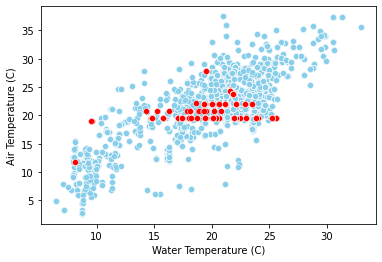

In [19]:
data = pd.read_csv('Canadian_Fish_Biodiversity.csv')
imp_ind = fish.index[~(fish['Air Temperature (C)'].isnull() == data['Air Temperature (C)'].isnull())]
imp_ind.shape[0]
sns.scatterplot(data = fish.loc[~(fish.index.isin(imp_ind))], x = 'Water Temperature (C)', y = 'Air Temperature (C)', color = 'skyblue')
sns.scatterplot(data = fish.loc[(fish.index.isin(imp_ind))], x = 'Water Temperature (C)', y = 'Air Temperature (C)', color = 'red')

### Question 2

This section begins to investigate the living conditions of fish at different locations and time periods. *(7 points total)*

a) Use a single *.groupby* statement to view the minimum, mean, standard deviation, and maximum air temperature and water temperature for each project during the month of August (use the *Month* column). *(2 points for code)*

In [22]:
grouped = data[data['Month'] == 8].groupby('Project Name')
datag = grouped[['Air Temperature (C)', "Water Temperature (C)"]].agg(['std', 'mean', 'min', 'max'])

In [23]:
datag

Air Temperature (C)             \
                                                             std       mean   
Project Name                                                                  
2013 Bridle Shiner Critical Habitat Survey              2.588098  24.609091   
2013 Crown Marsh Survey                                 2.057387  21.667872   
2013 GLAP Survey of Detroit River                       2.652812  24.406220   
2013 Grass Pickerel Niagara Drains                      2.498615  25.246154   
2013 Grass Pickerel Twenty Mile Creek                   2.395997  25.340107   
2013 Lake Chubsucker Critical Habitat Survey            3.968119  20.814612   
2013 Mussel Fish Community Assessment                   1.203286  24.535887   
2013 Pugnose Minnow Lake St Clair Drains                1.961982  25.303061   
2013 Species at Risk Assessment                         0.809362  24.456000   
2013 Spotted Gar Critical Habitat Survey                2.590503  22.706481   

                                                          \
                                               min   max   
Project Name                                               
2013 Bridle Shiner Critical Habitat Survey    20.7  26.5   
2013 Crown Marsh Survey                       16.4  26.2   
2013 GLAP Survey of Detroit River             21.1  28.3   
2013 Grass Pickerel Niagara Drains            20.8  28.2   
2013 Grass Pickerel Twenty Mile Creek         22.5  29.4   
2013 Lake Chubsucker Critical Habitat Survey  14.3  32.6   
2013 Mussel Fish Community Assessment         23.0  26.1   
2013 Pugnose Minnow Lake St Clair Drains      22.2  29.0   
2013 Species at Risk Assessment               23.3  25.0   
2013 Spotted Gar Critical Habitat Survey      18.6  27.7   

                                             Water Temperature (C)             \
                                                               std       mean   
Project Name                                                                    
2013 Bridle Shiner Critical Habitat Survey                0.503887  22.052182   
2013 Crown Marsh Survey                                   1.240151  22.007084   
2013 GLAP Survey of Detroit River                         0.392402  22.028226   
2013 Grass Pickerel Niagara Drains                        2.426792  20.105641   
2013 Grass Pickerel Twenty Mile Creek                     2.533686  22.380238   
2013 Lake Chubsucker Critical Habitat Survey              1.619878  21.671746   
2013 Mussel Fish Community Assessment                     1.156345  23.155645   
2013 Pugnose Minnow Lake St Clair Drains                  1.676571  20.713163   
2013 Species at Risk Assessment                           0.080936  22.075600   
2013 Spotted Gar Critical Habitat Survey                  1.978877  21.349769   

                                                             
                                                 min    max  
Project Name                                                 
2013 Bridle Shiner Critical Habitat Survey    20.630  22.44  
2013 Crown Marsh Survey                       17.430  23.24  
2013 GLAP Survey of Detroit River             21.646  23.11  
2013 Grass Pickerel Niagara Drains            17.150  23.96  
2013 Grass Pickerel Twenty Mile Creek         18.990  26.87  
2013 Lake Chubsucker Critical Habitat Survey  19.300  25.13  
2013 Mussel Fish Community Assessment         21.800  24.60  
2013 Pugnose Minnow Lake St Clair Drains      18.970  24.22  
2013 Species at Risk Assessment               21.960  22.13  
2013 Spotted Gar Critical Habitat Survey      18.639  24.30

b) Make lineplots showing maximum air temperature and water temperature by month and *Region*. To construct *Region*, use *pd.cut* to satisfy the following conditions:

* Rows with a latitude lower than 42.4 should have *Southern* in the *Region* column 
* Rows with a latitude between 42.4 and 42.8 should have *Central* in the *Region* column 
* Rows with a latitude higher than 42.8 should have *Northern* in the *Region* column 

You can have the month on the horizontal axis, the temperature on the vertical axis, different colors for different regions, and different styles (solid line / dotted line) to indicate air/water temperature.

Does anything in the visualization surprise you? Why or why not? *(4 points for code and visualization, 1 point for answer)*

In [25]:
data =  pd.read_csv("Canadian_Fish_Biodiversity.csv")
data['region'] = pd.cut(data['Start Latitude'], bins = [data['Start Latitude'].min(), 42.4, 42.8, data['Start Latitude'].max()], labels = ['Southern', "Central", 'Northern'])
data_max = data.groupby(['Month', 'region'], as_index = False)[['Air Temperature (C)', 'Water Temperature (C)']].max()
data = pd.melt(data, id_vars = data.columns[list(range(0,13))+list(range(15,17))], value_vars = ['Air Temperature (C)', 'Water Temperature (C)'], var_name = 'Temperature type', value_name = 'Temperature')

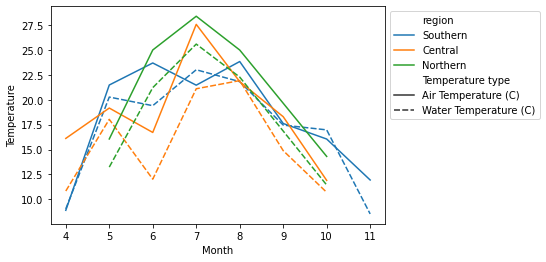

In [26]:
sns.lineplot(x = 'Month', y = 'Temperature', hue = 'region', style = 'Temperature type', data = data, ci = None)
plt.legend(bbox_to_anchor = (1,1))

I am surprised that Central temperatures dropped so drastically in month 6 (June), while the other regions generally increased as expected since it would be the summer.

### Question 3

Finally let's focus on the stars of this survey—the fish, of course. *(19 points total)*

a) Let's continue using our *Region* categorization. Find the top three fish species in each region by number captured. *(3 points for code)*

In [27]:
data.groupby(['region','Species'])['Number Captured'].sum().groupby('region').nlargest(n=3)

region    region    Species               
Southern  Southern  Lepomis macrochirus       10144.0
                    Dorosoma cepedianum        7118.0
                    Neogobius melanostomus     4530.0
Central   Central   Lepomis macrochirus        4252.0
                    Labidesthes sicculus       4058.0
                    Notropis heterodon         3124.0
Northern  Northern  Neogobius melanostomus     5044.0
                    Notropis volucellus        4208.0
                    Lepomis macrochirus        3682.0
Name: Number Captured, dtype: float64

b) Are certain fish only found in some regions? Visualize how many species are in all three regions, how many are in two of three, and how many were only captured in one region. *(3 points for code and visualization)*

<AxesSubplot:ylabel='count'>

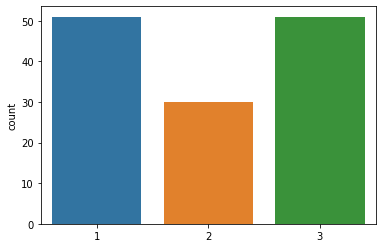

In [30]:
captures = pd.crosstab(data['Species'],data['region'])

counts = (captures != 0)
sns.countplot(x = counts.sum(axis = 1))

c) What percentage of all species are exclusively captured in the Southern region? How about the Northern Region? And the Central region? *(3 points for code)*

In [33]:
south = counts[(counts['Southern'] == True) & (counts['Central'] == False) & (counts['Northern'] == False)]['Southern'].sum() / counts.shape[0]
central = counts[(counts['Southern'] == False) & (counts['Central'] == True) & (counts['Northern'] == False)]['Central'].sum() / counts.shape[0]
north = counts[(counts['Southern'] == False) & (counts['Central'] == False) & (counts['Northern'] == True)]['Northern'].sum() / counts.shape[0]
print('The percentage for the Northern region is: ', north, '\nThe percentage for the Central region is: ', central, '\nThe percentage for the Southern region is: ', south)

The percentage for the Northern region is:  0.25 
The percentage for the Central region is:  0.045454545454545456 
The percentage for the Southern region is:  0.09090909090909091


d) Turbidity quantifies the level of cloudiness in liquid. For fish in each of the three regions, is there a correlative relationship between turbidity and # of fish caught? *(2 points for code, 1 point for answer)*

In [35]:
grouped = data.groupby('region')
grouped.apply(lambda x: x['Turbidity (ntu)'].corr(x['Number Captured']))

region
Southern   -0.019202
Central    -0.016327
Northern    0.063456
dtype: float64

There does not appear to be a strong correlation between the tubidity of the water and the number of fish caught, evidenced by the correlations all being close to 0. However, the Northern region correlation is the strongest at 0.06.

e) Now let's turn to the length of fish captured, given by *Maximum (mm)* and *Minimum (mm)*. Find the overall maximum and minimum lengths of all fish in each region. Which region has the largest range in captured fish length? *(2 points for code, 1 point for answer)*

In [41]:
max_min = grouped[['Maximum (mm)', 'Minimum (mm)']].agg(['max','min'])
max_min[('Maximum (mm)', 'max')] - max_min[('Minimum (mm)', 'min')]

region
Southern    1122.0
Central      776.0
Northern     750.0
dtype: float64

The Southern region has the largest range in captured fish length (1122).

f) Find the inverse Simpson index of species counts for each waterbody type (*WaterbodyType*) within each region. Which combination of waterbody type and region has the greatest diversity of fish species? Which has the least?

The inverse Simpson index $(\frac{1}{\lambda})$ is a measure of ecological diversity, for which a larger index number indicates a greater diversity of species. The index is calculated as:

$\frac{1}{\lambda} = 1/(\sum^R_{i=1} p_i^2)$

where $R$ is the number of unique species and $p_i$ is the proportion of fish belonging to species $i$. *(3 points for code, 1 point for answer)*

In [43]:
groups = data.groupby(['WaterbodyType', 'region', 'Species'])['Number Captured']
groups = groups.sum().reset_index().drop(columns = 'Species')
pi = lambda x: x['Number Captured']/np.sum(x['Number Captured'])
groups = groups.groupby(['WaterbodyType','region'])
simpson = 1/np.power(groups.apply(pi),2).droplevel(2)
simpson.loc[(simpson < np.inf) & ~(simpson.isnull())].groupby(['WaterbodyType','region']).sum().sort_values(ascending = False)

WaterbodyType  region  
Stream         Northern    8.450950e+09
               Southern    3.670133e+09
Lake           Southern    8.884888e+08
Wetland        Central     4.505977e+08
Stream         Central     2.725394e+08
Lake           Central     5.492184e+07
               Northern    1.818261e+07
Wetland        Southern    0.000000e+00
               Northern    0.000000e+00
Name: Number Captured, dtype: float64

The Northern Stream has the greatest diversity of fish species. The Northern Lake has the least diversity of fish species.